![title](static/wcar.png)
# to be defined
     and Michele Tinti**
    
    *Division of Systems Medicine, School of Medicine
    **Wellcome Centre for Anti-Infectives Research, School of Life Sciences
    University of Dundee

In [5]:
#reload library if modified
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#!ln -s /Users/mtinti/Desktop/git_projects/protUtil/ProLib ProLib

In [7]:
import os
import utilities as PTUT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ProtRank
import gc
plt.style.use('ggplot')

## Load Data

In [8]:
TXT_PATH = os.path.join('raw','combined','txt')
#TXT_PATH=''
df = pd.read_csv(os.path.join(TXT_PATH, 'proteinGroups.txt'),sep='\t')

#df[df['Protein IDs'].str.contains('ZDH20_MOUSE')]

In [9]:
df = PTUT.clean_df(df, score=1, unique_pep_threshold=2)
df = PTUT.mod_df(df)
print(df.shape)
df.head()

starting from: (5638, 79)
removed  197 Protein Groups by: Only identified by site
tot  197  entries removed
---------------
removed  53 Protein Groups by: Reverse
tot  250  entries removed
---------------
removed  75 Protein Groups by: Potential contaminant
tot  325  entries removed
---------------
Score
nothing removed
---------------
removed  472 Protein Groups by: Peptide counts (unique)
tot  797  entries removed
---------------
(4841, 82)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions,Taxonomy IDs,unique_int,Gene_id,desc
187,Tb927.5.4450:mRNA-p1;Tb05.5K5.100:mRNA-p1,Tb927.5.4450:mRNA-p1;Tb05.5K5.100:mRNA-p1,3;3,3;3,3;3,Tb927.5.4450:mRNA-p1 | transcript=Tb927.5.4450...,2,3,3,3,...,10240;40468;56702,10240;40468;56702,NaN,NaN,NaN,NaN,-1;-1,3,Tb927.5.4450,"hypothetical protein, conserved"
188,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1;Tb11...,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1;Tb11...,37;37;19,37;37;19,37;37;19,Tb05.5K5.110:mRNA-p1 | transcript=Tb05.5K5.110...,3,37,37,37,...,2291;2938;2939;4114;11550;12000;12027;20922;22...,2291;2938;2939;4114;11550;12000;12027;20922;22...,91,NaN,458,NaN,-1;-1;-1,37,Tb05.5K5.110,"major vault protein, putative"
189,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,17;17,17;17,17;17,Tb927.5.4470:mRNA-p1 | transcript=Tb927.5.4470...,2,17,17,17,...,1838;1839;3968;5286;8240;13635;16514;16876;185...,1839;3968;5286;8240;13635;16514;16876;18529;20...,NaN,NaN,NaN,NaN,-1;-1,17,Tb927.5.4470,"hypothetical protein, conserved"
190,Tb927.5.4480:mRNA-p1;Tb05.5K5.130:mRNA-p1,Tb927.5.4480:mRNA-p1;Tb05.5K5.130:mRNA-p1,41;41,41;41,41;41,Tb927.5.4480:mRNA-p1 | transcript=Tb927.5.4480...,2,41,41,41,...,6319;6320;6321;8075;8076;8077;8078;8904;12187;...,6319;6321;8076;8904;12187;12693;14508;16689;18...,92;93;94;95;3284,42;43;44,134;326;376;533;534,172;324;349,-1;-1,41,Tb927.5.4480,"paraflagellar rod component par4, putative"
191,Tb927.5.4500:mRNA-p1;Tb05.5K5.150:mRNA-p1,Tb927.5.4500:mRNA-p1;Tb05.5K5.150:mRNA-p1,11;11,11;11,11;11,Tb927.5.4500:mRNA-p1 | transcript=Tb927.5.4500...,2,11,11,11,...,8546;33936;33937;33938;38600;39601;54106;65809...,8546;33936;38600;39601;54106;65809;67106;70023...,96,NaN,30,NaN,-1;-1,11,Tb927.5.4500,"ras-like small GTPase, putative"


## iBAQ analysis 

In [10]:
#color palette
palette=['b','b','b','r','r','r']
palette_g = ['r','b']
color_dictionary = { 'b':'SM','r':'R'}

In [11]:
#list(df.columns)

SM1 - 126
SM2 - 127
SM3 - 128
R1 - 129
R2 - 130
R3 - 131

In [12]:
#tag='LFQ intensity'
tag='Reporter intensity corrected {} LG-148'
cols = [tag.format(n) for n in range(1,7)]
selection = df[cols]
selection.columns = ['SM1','SM2','SM3','R1','R2','R3' ]
selection.head()
#df[['Gene_id']].join(np.log2(selection).replace(0,np.nan),how='left').to_csv('in_pt.csv',index=False)

,SM1,SM2,SM3,R1,R2,R3
187,202520.0,167120.0,192210.0,217940.0,216410.0,171980.0
188,5809700.0,4628400.0,5037100.0,4584900.0,4746900.0,5327100.0
189,648760.0,521740.0,622260.0,516940.0,589300.0,527190.0
190,5863200.0,4627600.0,5535900.0,4714100.0,5247800.0,4997200.0
191,8699700.0,6696300.0,7637600.0,8512700.0,8722800.0,6195900.0


In [13]:
#print(selection.shape)
#all_na = selection.replace(0,np.nan).isna().sum(axis=1)==6
#selection=selection[~all_na]
#print(selection.shape)

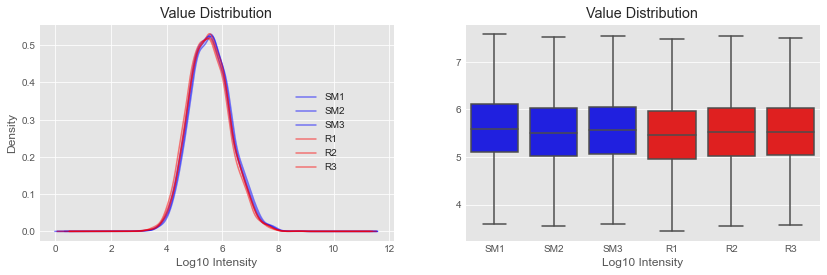

In [14]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(14,4))

np.log10(selection.replace(0,np.nan)).plot(
    kind='kde', color=palette, alpha=0.5,ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
axes[0].set_title('Value Distribution')
axes[0].set_xlabel('Log10 Intensity')

sns.boxplot(data =np.log10(selection.replace(0,np.nan)),
            showfliers=False,palette=palette,ax=axes[1])
plt.title('Value Distribution')
plt.xlabel('Log10 Intensity')
plt.savefig(os.path.join(TXT_PATH, 'value_distribution.png'))
plt.show()

In [15]:
selection.describe()

,SM1,SM2,SM3,R1,R2,R3
count,4.841000e+03,4.841000e+03,4.841000e+03,4.841000e+03,4.841000e+03,4.841000e+03
mean,2.079519e+06,1.675650e+06,1.838082e+06,1.430467e+06,1.672064e+06,1.632465e+06
std,1.051444e+07,8.415594e+06,9.214169e+06,7.261812e+06,8.388520e+06,8.336811e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.250600e+05,1.044800e+05,1.158500e+05,8.999600e+04,1.045100e+05,1.080800e+05
50%,3.947300e+05,3.248700e+05,3.654200e+05,2.858000e+05,3.277000e+05,3.368100e+05
75%,1.285600e+06,1.052800e+06,1.146300e+06,9.337600e+05,1.073300e+06,1.068700e+06
max,5.652400e+08,4.589000e+08,5.002100e+08,3.987800e+08,4.611700e+08,4.698300e+08


In [16]:
selection.head()

,SM1,SM2,SM3,R1,R2,R3
187,202520.0,167120.0,192210.0,217940.0,216410.0,171980.0
188,5809700.0,4628400.0,5037100.0,4584900.0,4746900.0,5327100.0
189,648760.0,521740.0,622260.0,516940.0,589300.0,527190.0
190,5863200.0,4627600.0,5535900.0,4714100.0,5247800.0,4997200.0
191,8699700.0,6696300.0,7637600.0,8512700.0,8722800.0,6195900.0


In [67]:
norm_selection = PTUT.norm_loading_TMT(selection)

SM1    1.006695e+10
SM2    8.111819e+09
SM3    8.898155e+09
R1     6.924891e+09
R2     8.094462e+09
R3     7.902764e+09
dtype: float64
8333173578.188334
SM1    0.827775
SM2    1.027288
SM3    0.936506
R1     1.203365
R2     1.029491
R3     1.054463
dtype: float64


In [68]:
norm_selection = norm_selection.replace(0,np.nan)
norm_selection=norm_selection.fillna(norm_selection.min())
norm_selection['mean_sm']= norm_selection[['SM1','SM2','SM3']].mean(axis=1,skipna=True)
norm_selection['mean_r']= norm_selection[['R1','R2','R3']].mean(axis=1,skipna=True)
norm_selection['log2fc']=np.log2(norm_selection['mean_r'] / norm_selection['mean_sm'])
norm_selection['log10intensity']=np.log10(norm_selection[['mean_sm','mean_r']].sum(axis=1))


In [69]:
norm_selection.head()

,SM1,SM2,SM3,R1,R2,R3,mean_sm,mean_r,log2fc,log10intensity
187,1.676411e+05,1.716803e+05,1.800058e+05,2.622615e+05,2.227921e+05,1.813466e+05,1.731091e+05,2.221334e+05,0.359745,5.596864
188,4.809127e+06,4.754699e+06,4.717273e+06,5.517310e+06,4.886889e+06,5.617231e+06,4.760366e+06,5.340477e+06,0.165896,7.004358
189,5.370276e+05,5.359772e+05,5.827501e+05,6.220677e+05,6.066789e+05,5.559024e+05,5.519183e+05,5.948830e+05,0.108151,6.059488
190,4.853413e+06,4.753877e+06,5.184402e+06,5.672785e+06,5.402561e+06,5.269363e+06,4.930564e+06,5.448236e+06,0.144037,7.016147
191,7.201397e+06,6.879028e+06,7.152657e+06,1.024389e+07,8.980041e+06,6.533348e+06,7.077694e+06,8.585759e+06,0.278666,7.194888


In [70]:
norm_selection=norm_selection.sort_values('log10intensity',ascending=False)
norm_selection['q_log10intensity'] = pd.qcut(norm_selection['log10intensity']
                                             , 10, labels=range(10))

In [71]:
import numpy as np
def get_estimator(nstd=3):
    x = (norm_selection.groupby('q_log10intensity')['log2fc'].mean()+
         norm_selection.groupby('q_log10intensity')['log2fc'].std()*nstd)
    y = norm_selection.groupby('q_log10intensity')['log10intensity'].mean()
    z = np.polyfit(y,x,2)
    f = np.poly1d(z)
    return f


In [72]:
norm_selection['limit_1'] = get_estimator(nstd=3)(norm_selection['log10intensity'])
norm_selection['limit_2'] = get_estimator(nstd=5)(norm_selection['log10intensity'])
norm_selection['pass_1'] = [True if a > b or a < -b else False 
                            for a,b in zip(norm_selection['log2fc'],norm_selection['limit_1'])]
norm_selection['pass_2'] = [True if a > b or a < -b else False 
                            for a,b in zip(norm_selection['log2fc'],norm_selection['limit_2'])]

norm_selection.head()

,SM1,SM2,SM3,R1,R2,R3,mean_sm,mean_r,log2fc,log10intensity,q_log10intensity,limit_1,limit_2,pass_1,pass_2
541,4.678918e+08,4.714224e+08,4.684496e+08,4.798780e+08,4.747702e+08,4.954184e+08,4.692546e+08,4.833556e+08,0.042714,8.978915,9,1.061987,1.897885,False,False
4096,1.555555e+08,1.318729e+08,1.436600e+08,1.393016e+08,1.210269e+08,1.222966e+08,1.436962e+08,1.275417e+08,-0.172052,8.433350,9,0.920195,1.613663,False,False
445,8.762830e+07,9.051639e+07,8.946065e+07,9.689739e+07,8.718963e+07,8.717774e+07,8.920178e+07,9.042158e+07,0.019595,8.254363,9,0.881951,1.535970,False,False
2587,8.673430e+07,8.544569e+07,8.886129e+07,9.032942e+07,8.777026e+07,8.577109e+07,8.701376e+07,8.795692e+07,0.015554,8.242965,9,0.879654,1.531282,False,False
442,7.685315e+07,7.422977e+07,7.275807e+07,8.454243e+07,7.263263e+07,7.314600e+07,7.461366e+07,7.677369e+07,0.041172,8.180090,9,0.867282,1.505986,False,False


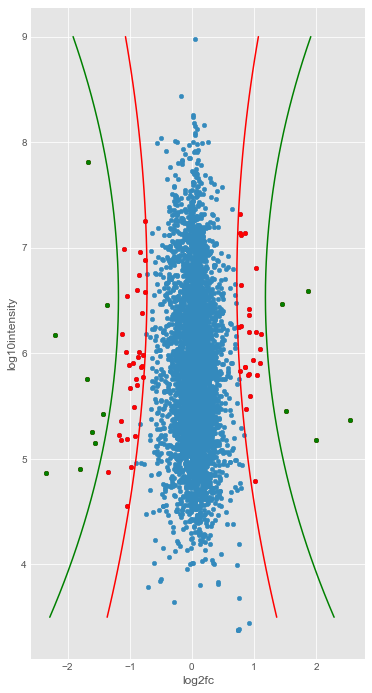

In [73]:
fig,ax=plt.subplots(figsize=(6,12))
norm_selection.plot(y='log10intensity',x='log2fc',kind='scatter',ax=ax)
#ax.scatter(x,y)
x_new = np.linspace(3.5, 9, 50)
norm_selection[norm_selection['pass_1']].plot(y='log10intensity',
                                              x='log2fc',kind='scatter',ax=ax,c='r')

norm_selection[norm_selection['pass_2']].plot(y='log10intensity',
                                              x='log2fc',kind='scatter',ax=ax,c='g')

ax.plot(get_estimator(nstd=3)(x_new),x_new ,c='r')
ax.plot(-get_estimator(nstd=3)(x_new),x_new ,c='r')

ax.plot(get_estimator(nstd=5)(x_new),x_new ,c='g')
ax.plot(-get_estimator(nstd=5)(x_new),x_new ,c='g')


In [85]:
polys_res = pd.read_csv('sm_vs_r.csv')
polys_res.head()

,Unnamed: 0,V1,log-ratios C2 vs C1,log-ratios C1 vs C2,FDR PolySTest C2 vs C1,FDR PolySTest C1 vs C2,FDR limma C2 vs C1,FDR limma C1 vs C2,FDR Miss test C2 vs C1,FDR Miss test C1 vs C2,...,FDR permutation test C1 vs C2,FDR t-test C2 vs C1,FDR t-test C1 vs C2,Selected,SM1,R1,SM2,R2,SM3,R3
0,feature 1,Tb927.5.4450,0.344103,-0.344103,0.198091,0.198091,0.049523,0.049523,1.000000,1.000000,...,0.417224,0.142251,0.142251,False,17.355016,18.000646,17.389365,17.765338,17.457684,17.468390
1,feature 2,Tb05.5K5.110,0.163219,-0.163219,0.190022,0.190022,0.056960,0.056960,0.095011,0.095011,...,0.446866,0.129406,0.129406,False,22.197343,22.395534,22.180923,22.220485,22.169522,22.421428
2,feature 3,Tb927.5.4470,0.107597,-0.107597,0.477864,0.477864,0.119466,0.119466,1.000000,1.000000,...,0.626259,0.150533,0.150533,False,19.034637,19.246712,19.031812,19.210574,19.152518,19.084472
3,feature 4,Tb927.5.4480,0.144349,-0.144349,0.224964,0.224964,0.056241,0.056241,0.378600,0.378600,...,0.359022,0.090392,0.090392,False,22.210568,22.435626,22.180673,22.365212,22.305746,22.329197
4,feature 5,Tb927.5.4500,0.254092,-0.254092,0.485455,0.485455,0.121364,0.121364,0.296422,0.296422,...,0.603553,0.216517,0.216517,False,22.779845,23.288260,22.713773,23.098291,22.770048,22.639391


In [89]:
temp = norm_selection.drop(['q_log10intensity','limit_1','limit_2'],axis=1).sort_values(
'log2fc',ascending=False)#.to_csv('Lucia_new.csv')
temp = temp.set_index('Gene_id').join(polys_res.set_index('V1')[['FDR PolySTest C2 vs C1']])
temp.columns = list(temp.columns)[0:-1]+['FDR']
temp.to_csv('Lucia_new.csv')

In [74]:
#norm_selection = norm_selection.join(df[['Gene_id','desc']])

#color = []
#for a,b in zip(norm_selection['pass_1'],norm_selection['pass_2']):
#    if a and b:
#        color.append('Green')
#    elif a:
##        color.append('Red')
#    else:
#        color.append('Blue')
        
    
#final_selection['color'] = color


In [99]:
import plotly.graph_objects as go
fig = go.Figure()
# Add traces

x = norm_selection[ norm_selection['pass_1'] & ~norm_selection['pass_2']]['log2fc']
y = norm_selection[ norm_selection['pass_1'] & ~norm_selection['pass_2']]['log10intensity']
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='3std',
                    marker_color = 'Red', 
                    hovertext=   norm_selection[norm_selection['pass_1'] ]['Gene_id']+\
                         '<br>'+norm_selection[norm_selection['pass_1'] ]['desc'] 
                        ))

x = norm_selection[~norm_selection['pass_1'] ]['log2fc']
y = norm_selection[~norm_selection['pass_1'] ]['log10intensity']
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='all',
                    marker_color = 'Blue',    
                       ))

x = norm_selection[norm_selection['pass_2']]['log2fc']
y = norm_selection[norm_selection['pass_2']]['log10intensity']
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='5std',
                    marker_color = 'Green',
                    hovertext=   norm_selection[norm_selection['pass_1'] ]['Gene_id']+\
                         '<br>'+norm_selection[norm_selection['pass_1'] ]['desc'] 
                        
                        ))

x_new = np.linspace(3.2, 9, 50)
x=get_estimator(nstd=5)(x_new)
y=x_new
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines',
                    name='plus 5std',
                        line_color='Green'))

x_new = np.linspace(3.2, 9, 50)
x=get_estimator(nstd=5)(x_new)
y=x_new
fig.add_trace(go.Scatter(x=-x, y=y,
                    mode='lines',
                    name='minus 5std',
                        line_color='Green'))


x_new = np.linspace(3.2, 9, 50)
x=get_estimator(nstd=3)(x_new)
y=x_new
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines',
                    name='plus 3std',
                    line_color='Red'))

x_new = np.linspace(3.2, 9, 50)
x=get_estimator(nstd=3)(x_new)
y=x_new
fig.add_trace(go.Scatter(x=-x, y=y,
                    mode='lines',
                    name='minus 3std',
                    line_color='Red'))

fig.update_layout(
    autosize=False,
    width=900,
    height=900,
    title="MA plot",
    xaxis_title="Log2 FC",
    yaxis_title="Log10 intensity",
)


In [91]:
fig.write_html("Lucia_new.html")

In [40]:
import plotly.express as px

In [41]:
fig1 = px.scatter(final_selection, x='log2fc', y='log10intensity', color="color",
                 #title='PIGA interacting partners',
                 width=600, height=800,
                 hover_name="Gene_id", hover_data=["desc"],
                 #color_continuous_scale='Bluered',#px.colors.sequential.Viridis,
                )


fig1.write_html("test_fig.html")

In [42]:


from IPython.display import IFrame
IFrame("test_fig.html", width=1000, height=600)



In [88]:
temp = pd.concat([df[(norm_selection.T != 0).any()][['Gene_id']],
           np.log2(norm_selection[(norm_selection.T != 0).any()].replace(0,np.nan))],axis=1)

temp.replace(np.nan,'NA').to_csv('normed.csv',index=False)

In [97]:
temp['']

,Gene_id,SM1,SM2,SM3,R1,R2,R3
187,Tb927.5.4450,17.355016,17.389365,17.457684,18.000646,17.765338,17.468390
188,Tb05.5K5.110,22.197343,22.180923,22.169522,22.395534,22.220485,22.421428
189,Tb927.5.4470,19.034637,19.031812,19.152518,19.246712,19.210574,19.084472
190,Tb927.5.4480,22.210568,22.180673,22.305746,22.435626,22.365212,22.329197
191,Tb927.5.4500,22.779845,22.713773,22.770048,23.288260,23.098291,22.639391


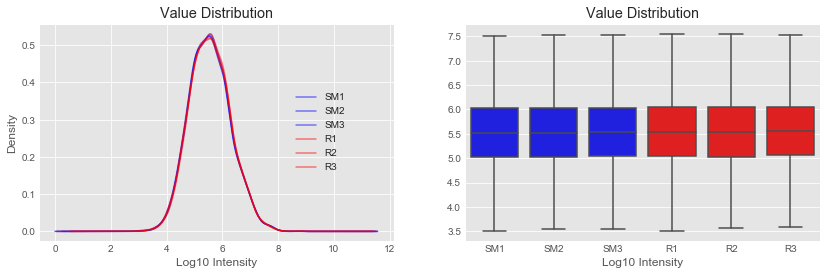

In [57]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(14,4))

np.log10(norm_selection.replace(0,np.nan)).plot(
    kind='kde', color=palette, alpha=0.5,ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
axes[0].set_title('Value Distribution')
axes[0].set_xlabel('Log10 Intensity')

sns.boxplot(data =np.log10(norm_selection.replace(0,np.nan)),
            showfliers=False,palette=palette,ax=axes[1])
plt.title('Value Distribution')
plt.xlabel('Log10 Intensity')
plt.savefig(os.path.join(TXT_PATH, 'value_distribution.png'))
plt.show()

## Missing Data

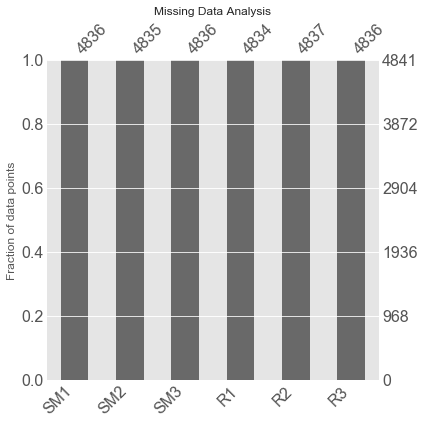

In [12]:
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
#visualization of missing data
ax=msno.bar(selection.replace(0,np.nan),figsize=(6, 6))
plt.title('Missing Data Analysis',size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.tight_layout()
plt.savefig('missing.png')
plt.show()

{'b': 'SM', 'r': 'R'}


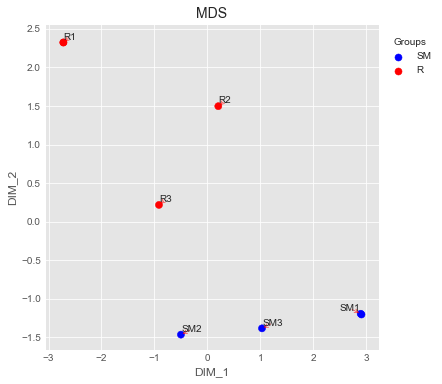

In [13]:
plt.style.use('ggplot')
np.random.seed=1976
fig,ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1)
PTUT.make_mds(np.log10(selection+1).dropna(),
              palette,ax,color_dictionary=color_dictionary,top=1200)
plt.savefig('MDS.png')
plt.show()

## Differential Abundance

### ProtRank indata

In [14]:
indata_prank=selection.join(df[['Gene_id']],how='left')
indata_prank.set_index('Gene_id',drop=True,inplace=True)
indata_prank=indata_prank
indata_prank.to_csv(os.path.join(TXT_PATH, 'indata_ProtRank.csv'))
indata_prank.head()

,SM1,SM2,SM3,R1,R2,R3
Gene_id,,,,,,
Tb927.5.4450,202520.0,167120.0,192210.0,217940.0,216410.0,171980.0
Tb05.5K5.110,5809700.0,4628400.0,5037100.0,4584900.0,4746900.0,5327100.0
Tb927.5.4470,648760.0,521740.0,622260.0,516940.0,589300.0,527190.0
Tb927.5.4480,5863200.0,4627600.0,5535900.0,4714100.0,5247800.0,4997200.0
Tb927.5.4500,8699700.0,6696300.0,7637600.0,8512700.0,8722800.0,6195900.0


In [15]:
indata_prank.columns

Index(['SM1', 'SM2', 'SM3', 'R1', 'R2', 'R3'], dtype='object')

### ProtRank Test

In [16]:
what_to_compare = [[
    ['SM1', 'R1'], 
    ['SM2', 'R2' ], 
    ['SM3', 'R3' ],                  
                   ]]
ProtRank.data_stats(indata_prank, what_to_compare = what_to_compare)
description = 'SM_vs_R'
significant_proteins = ProtRank.rank_proteins(
    indata_prank+indata_prank[indata_prank>0].min(), 
    what_to_compare, description,
    path_to=TXT_PATH,num_bootstrap_realizations=100)


input data contain results for 4841 proteins and 6 different conditions
list of measured conditions: SM1, SM2, SM3, R1, R2, R3
in the data, 0.1% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['SM1', 'R1'], ['SM2', 'R2'], ['SM3', 'R3']]]
after ignoring 4 rows with only zero counts, 4837 rows remain
in the analyzed data, 0.0% of all counts are zeros
median count is 3.38e+05 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 7.54e+05
ratio between the 90th and the 10th percentile non-zero count is 7.64e+01
statistics of irregular missing values:
  in total, there are 6 comparisons involving a zero and a non-zero value (0.0% of all)
  out of 14511 comparisons, 0 involve a zero value and a non-zero exceeding 1.0 * median (0.0% of all)
  (the smaller the fraction, the smaller the problem with irregular zeros in the data)

there are 1 groups of compariso

### Result Table

In [17]:
mytable = pd.read_csv(os.path.join(TXT_PATH,'prs-SM_vs_R.dat'),
                   sep='\t', comment='#', index_col=[0],
                   names=['Gene_id','rank','FDR','sign'])
mytable['log_FDR']=-np.log10(mytable['FDR']+0.00053)
mytable['log_rank']=np.log10(mytable['rank'])
mytable['srank']=[n*1 if a=='+' else n*-1 for n,a in zip(mytable['rank'],mytable['sign'])]
mytable=mytable.merge(df,left_on='Gene_id',right_on='Gene_id',how='left')
#temp_1=temp_1.merge(aboundance_df,left_on='Gene_id',right_on='Gene ID',how='left')
mytable['exp_rank']=mytable['rank'].rank(ascending=False)
mytable.to_csv('res_table.csv')

In [92]:
mytable.head()

,Gene_id,rank,FDR,sign,log_FDR,log_rank,srank,Protein IDs,Majority protein IDs,Peptide counts (all),...,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions,Taxonomy IDs,unique_int,desc,exp_rank
0,Tb927.2.6320,680.578278,-0.0,+,3.275724,2.832878,680.578278,Tb927.2.6320:mRNA-p1,Tb927.2.6320:mRNA-p1,8,...,2258;12620;28593;28594;37810;49596;49597;49598...,2258;12620;28593;28594;37810;49596;53087;65581,1852;3780;3781,1049;1050,288;290;291,292;298,-1,3,"adenosine transporter 2, putative",1.0
1,Tb927.11.2230,525.749250,-0.0,-,3.275724,2.720779,-525.749250,Tb927.11.2230:mRNA-p1,Tb927.11.2230:mRNA-p1,17,...,1794;2897;7775;8908;9526;21246;22891;22892;254...,1794;2897;7775;8908;9526;21246;22891;25404;262...,NaN,NaN,NaN,NaN,-1,16,"carnitine O-acetyltransferase, putative",2.0
2,Tb927.10.15410,480.042467,-0.0,-,3.275724,2.681280,-480.042467,Tb927.10.15410:mRNA-p1,Tb927.10.15410:mRNA-p1,2,...,28029;73931,28029;73931,NaN,NaN,NaN,NaN,-1,2,glycosomal malate dehydrogenase,3.0
3,Tb927.10.7300,404.387645,-0.0,+,3.275724,2.606798,404.387645,Tb927.10.7300:mRNA-p1,Tb927.10.7300:mRNA-p1,8,...,16695;38208;50739;50740;50741;54999;55000;6256...,16695;38208;50741;55000;62561;63140,1064,NaN,18,NaN,-1,6,"hypothetical protein, conserved",4.0
4,Tb927.6.4470,339.356425,-0.0,+,3.275724,2.530656,339.356425,Tb927.6.4470:mRNA-p1,Tb927.6.4470:mRNA-p1,3,...,40472;61095;67849,40472;61095;67849,NaN,NaN,NaN,NaN,-1,3,S-adenosylmethionine decarboxylase proenzyme,5.0


In [96]:
mytable[mytable['rank']>100][['Gene_id','srank','desc']].to_csv('selection.csv')

In [19]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
cm2inch(19, 9.5)

(7.480314960629921, 3.7401574803149606)

In [20]:
name_dict = {
    'Q5SS83': 'FLOT2',
    'A0A0J9YTY0':'SEPT6',
    'A0A0R4J1G9':'STEA3',
    'E9Q616':'Ahnak'
}

## Fig1 Top Interacting Proteins

In [91]:
mytable['FDR']=mytable['FDR']*-1
mytable['FDR'][0:5]

0   -0.0
1   -0.0
2   -0.0
3   -0.0
4   -0.0
Name: FDR, dtype: float64

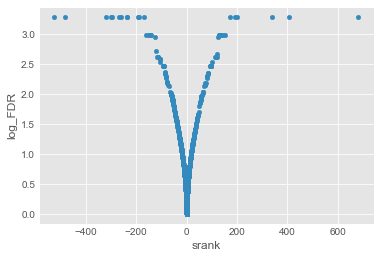

In [90]:
mytable.plot(kind='scatter',x='srank', y='log_FDR')

In [23]:
mytable.head()

,Gene_id,rank,FDR,sign,log_FDR,log_rank,srank,Protein IDs,Majority protein IDs,Peptide counts (all),...,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions,Taxonomy IDs,unique_int,desc,exp_rank
0,Tb927.2.6320,680.578278,-0.0,+,3.275724,2.832878,680.578278,Tb927.2.6320:mRNA-p1,Tb927.2.6320:mRNA-p1,8,...,2258;12620;28593;28594;37810;49596;49597;49598...,2258;12620;28593;28594;37810;49596;53087;65581,1852;3780;3781,1049;1050,288;290;291,292;298,-1,3,"adenosine transporter 2, putative",1.0
1,Tb927.11.2230,525.749250,-0.0,-,3.275724,2.720779,-525.749250,Tb927.11.2230:mRNA-p1,Tb927.11.2230:mRNA-p1,17,...,1794;2897;7775;8908;9526;21246;22891;22892;254...,1794;2897;7775;8908;9526;21246;22891;25404;262...,NaN,NaN,NaN,NaN,-1,16,"carnitine O-acetyltransferase, putative",2.0
2,Tb927.10.15410,480.042467,-0.0,-,3.275724,2.681280,-480.042467,Tb927.10.15410:mRNA-p1,Tb927.10.15410:mRNA-p1,2,...,28029;73931,28029;73931,NaN,NaN,NaN,NaN,-1,2,glycosomal malate dehydrogenase,3.0
3,Tb927.10.7300,404.387645,-0.0,+,3.275724,2.606798,404.387645,Tb927.10.7300:mRNA-p1,Tb927.10.7300:mRNA-p1,8,...,16695;38208;50739;50740;50741;54999;55000;6256...,16695;38208;50741;55000;62561;63140,1064,NaN,18,NaN,-1,6,"hypothetical protein, conserved",4.0
4,Tb927.6.4470,339.356425,-0.0,+,3.275724,2.530656,339.356425,Tb927.6.4470:mRNA-p1,Tb927.6.4470:mRNA-p1,3,...,40472;61095;67849,40472;61095;67849,NaN,NaN,NaN,NaN,-1,3,S-adenosylmethionine decarboxylase proenzyme,5.0


In [27]:
#import plotly.express as px
#from plotly.subplots import make_subplots



#fig1 = px.scatter(mytable, x='srank', y='log_FDR', #color="log_FDR",
#                 #title='PIGA interacting partners',
#                 width=800, height=600,
#                 hover_name="Gene_id", hover_data=["desc"],
#                 #color_continuous_scale='Bluered',#px.colors.sequential.Viridis,
#                )


#fig2 = px.scatter(mytable, x='srank', y='log_FDR', #color="log_FDR",
#                 #title='PIGA interacting partners',
#                 width=800, height=600,
#                 hover_name="Gene_id", hover_data=["desc"],
#                 #color_continuous_scale='Bluered',#px.colors.sequential.Viridis,
#                )



#trace1 = fig1['data'][0]
#trace2 = fig2['data'][0]

#fig = make_subplots(rows=1, cols=2, shared_xaxes=False,shared_yaxes=False)
#fig.add_trace(trace1, row=1, col=1)
#fig.add_trace(trace2, row=1, col=2)

#fig.layout["xaxis"].title.text = "Experiment Rank"
#fig.layout["xaxis2"].title.text = "Experiment Rank"
#fig.layout["yaxis"].title.text = "Log10 FDR"
#fig.layout["yaxis2"].title.text = "Log10 FDR"
#fig.update_layout(title_text='BACE1 Interacting Partners')
##fig.show()
#fig.write_html("res.html")

In [28]:
from IPython.display import IFrame
#IFrame("res.html", width=1000, height=600)

## Find Coverage

In [37]:
from Bio import SeqIO
seq_dict = {}
for seq_record in SeqIO.parse("TriTrypDB-46_TbruceiTREU927_AnnotatedProteins_VSG.fasta", "fasta"):
    seq_dict[seq_record.id.split(':')[0]]=str(seq_record.seq)
seq_dict['Tb927.2.6320']

'MAMLGFESTAEFFVYLTFIFFGMSVMNVTNAIYSNYNFFSEYYKFVKKQEKAEPENESFWKHMFTYYNVVVFTMQVVLEAFMLTPLGRRIPISWRLIFGLTIPMVEIIVILVIPAVGGSENGAIATMMMVAFVGGISKTLCDSSNAALAGPFPTKFYGAIVWGLAISGLMTSFLAIVIQASMDSSFTSKNTQSQIYFGLVMLLQVVACVLLVLLRKNPYAIKYAAEFRYAARKDGVTGDRADGEFDAKGTGPADENRYPDEKENKNVLNADIDPDDMRDTDQVEGTTNAQQMLDASVMVVVKRIWPMLVACFFVFFATLLVFPGVFIAAKTGDTSGWYFTVVVAMFNLGDFLSRLVLQFKQLHVSPRMVMIGSFARALLIIPLSLCAAGTVTGVWLPYIVSLLWGLTNGYFGGLSMIYGPRTGSLTTAGQRSLAAICINVALLMGLFVGAMFALAVKEGLPK'

In [38]:
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions,Taxonomy IDs,unique_int,Gene_id,desc
187,Tb927.5.4450:mRNA-p1;Tb05.5K5.100:mRNA-p1,Tb927.5.4450:mRNA-p1;Tb05.5K5.100:mRNA-p1,3;3,3;3,3;3,Tb927.5.4450:mRNA-p1 | transcript=Tb927.5.4450...,2,3,3,3,...,10240;40468;56702,10240;40468;56702,NaN,NaN,NaN,NaN,-1;-1,3,Tb927.5.4450,"hypothetical protein, conserved"
188,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1;Tb11...,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1;Tb11...,37;37;19,37;37;19,37;37;19,Tb05.5K5.110:mRNA-p1 | transcript=Tb05.5K5.110...,3,37,37,37,...,2291;2938;2939;4114;11550;12000;12027;20922;22...,2291;2938;2939;4114;11550;12000;12027;20922;22...,91,NaN,458,NaN,-1;-1;-1,37,Tb05.5K5.110,"major vault protein, putative"
189,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,17;17,17;17,17;17,Tb927.5.4470:mRNA-p1 | transcript=Tb927.5.4470...,2,17,17,17,...,1838;1839;3968;5286;8240;13635;16514;16876;185...,1839;3968;5286;8240;13635;16514;16876;18529;20...,NaN,NaN,NaN,NaN,-1;-1,17,Tb927.5.4470,"hypothetical protein, conserved"
190,Tb927.5.4480:mRNA-p1;Tb05.5K5.130:mRNA-p1,Tb927.5.4480:mRNA-p1;Tb05.5K5.130:mRNA-p1,41;41,41;41,41;41,Tb927.5.4480:mRNA-p1 | transcript=Tb927.5.4480...,2,41,41,41,...,6319;6320;6321;8075;8076;8077;8078;8904;12187;...,6319;6321;8076;8904;12187;12693;14508;16689;18...,92;93;94;95;3284,42;43;44,134;326;376;533;534,172;324;349,-1;-1,41,Tb927.5.4480,"paraflagellar rod component par4, putative"
191,Tb927.5.4500:mRNA-p1;Tb05.5K5.150:mRNA-p1,Tb927.5.4500:mRNA-p1;Tb05.5K5.150:mRNA-p1,11;11,11;11,11;11,Tb927.5.4500:mRNA-p1 | transcript=Tb927.5.4500...,2,11,11,11,...,8546;33936;33937;33938;38600;39601;54106;65809...,8546;33936;38600;39601;54106;65809;67106;70023...,96,NaN,30,NaN,-1;-1,11,Tb927.5.4500,"ras-like small GTPase, putative"


In [44]:
df_pep = pd.read_csv('raw/combined/txt/peptides.txt',sep='\t')
#df_pep.head()

df[df['Gene_id'].isin(['Tb927.2.6320'])]['Peptide IDs'].values[0].split(';')

['1354', '8046', '18832', '18833', '24758', '32712', '34873', '43620']

In [45]:
peps = df_pep[df_pep['id'].isin(
    df[df['Gene_id'].isin(['Tb927.2.6320'])]['Peptide IDs'].values[0].split(';'))]
peps.head()

,Sequence,N-term cleavage window,C-term cleavage window,Amino acid before,First amino acid,Second amino acid,Second last amino acid,Last amino acid,Amino acid after,A Count,...,id,Protein group IDs,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Taxonomy IDs,MS/MS Count
1354,AEPENESFWK,NFFSEYYKFVKKQEKAEPENESFWKHMFTY,KKQEKAEPENESFWKHMFTYYNVVVFTMQV,K,A,E,W,K,H,1,...,1354,2937,1446,2128,2258,2258.0,NaN,NaN,NaN,1
8046,DTDQVEGTTNAQQMLDASVMVVVK,NKNVLNADIDPDKMKDTDQVEGTTNAQQML,NAQQMLDASVMVVVKRIWPMLLSCFFVFFA,K,D,T,V,K,R,2,...,8046,2935;2937;2933,8514,12005,12620,12620.0,1852;3780;3781,1049;1050,NaN,0
18832,GTGPADENRYPDEK,DGVTGDRADGEFDAKGTGPADENRYPDEKE,KGTGPADENRYPDEKENKNVLNADIDPDDM,K,G,T,E,K,E,1,...,18832,2937,19876,27202,28593,28593.0,NaN,NaN,NaN,1
18833,GTGPADENRYPDEKENK,DGVTGDRADGEFDAKGTGPADENRYPDEKE,GPADENRYPDEKENKNVLNADIDPDDMRDT,K,G,T,N,K,N,1,...,18833,2937,19877,27203,28594,28594.0,NaN,NaN,NaN,1
24758,KNPYAIK,MFLQVVACVLLVLLRKNPYAIKYAAEFRYA,CVLLVLLRKNPYAIKYAAEFRYAARKDGKT,R,K,N,I,K,Y,1,...,24758,2935;2936;2937;2933,26227,35919,37810,37810.0,NaN,NaN,NaN,1


In [46]:
from IPython.core.display import display, HTML

class ProtViz():
    def __init__(self,seq):
        self.seq = seq
        
    def add_peps(self,peps):
        self.peps = peps
        covered_aa = []
        for pep in self.peps.index.values:
            start = self.peps.loc[pep]['Start position'].astype(int)
            end = self.peps.loc[pep]['End position'].astype(int)
            covered_aa+=range(start,end+1)
        covered_aa=set(covered_aa)
        self.covered_aa = covered_aa

    def get_coverage(self):
        coverage=[]
        for index,aa in enumerate(self.seq):
            pos = index+1
            if pos in self.covered_aa:
                coverage.append(1)
            else:
                coverage.append(0)
        self.coverage = coverage
    
    def make_bold(self):
        self.get_coverage()
        out = '<p style=\"font-family:\'Courier New\'\">'
        for index,(cov,aa) in enumerate(zip(self.coverage,self.seq)):
            if index%60==0:
                out+='<br>'
            if cov ==1:
                out+='<b>'+aa+'</b>'
            else:
                out+=aa
        out+='</p>'
        return out

### coverage

,Sequence,N-term cleavage window,C-term cleavage window,Amino acid before,First amino acid,Second amino acid,Second last amino acid,Last amino acid,Amino acid after,A Count,...,id,Protein group IDs,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Taxonomy IDs,MS/MS Count
0,AAAAAAAAEVESGIAGVEETLR,______________________________,AEVESGIAGVEETLRRLGLVGGADKAGRNS,K,A,A,L,R,R,9,...,0,3655,0,0,0,0.0,NaN,NaN,NaN,1
1,AAAAAAR,TFEDDNHDDNSTARKAAAAAARRMESSGII,DDNSTARKAAAAAARRMESSGIIKSKKRLR,K,A,A,A,R,R,6,...,1,4833,1,1,1,1.0,NaN,NaN,NaN,1
2,AAAAAASAR,IARVSLASYSPEAVKAAAAAASARMKEYRD,SPEAVKAAAAAASARMKEYRDDLKRYEESC,K,A,A,A,R,M,7,...,2,2983,2,2,2,2.0,NaN,NaN,NaN,1
3,AAAAAFQESVGR,LVVTSLFDREVHVRRAAAAAFQESVGRLGN,VRRAAAAAFQESVGRLGNFPDGIRLVTTMD,R,A,A,G,R,L,5,...,3,4956,3,3,3,3.0,NaN,NaN,NaN,1
4,AAAAATAVVK,PEKELEPMRATRKKRAAAAATAVVKGKAKD,TRKKRAAAAATAVVKGKAKDTGKRGKSKDP,R,A,A,V,K,G,6,...,4,3015,4,4,4,4.0,NaN,NaN,NaN,1


In [48]:
pv = ProtViz(seq_dict['Tb927.2.6320'])
pv.add_peps(peps[['Sequence','Start position','End position']])
display(HTML(pv.make_bold()))

In [54]:
## Save notebook as HTML

In [55]:
!jupyter nbconvert --to html_toc analysis_def.ipynb

[NbConvertApp] Converting notebook analysis_def.ipynb to html_toc
[NbConvertApp] Support files will be in analysis_def_files/
[NbConvertApp] Making directory analysis_def_files
[NbConvertApp] Making directory analysis_def_files
[NbConvertApp] Making directory analysis_def_files
[NbConvertApp] Making directory analysis_def_files
[NbConvertApp] Making directory analysis_def_files
[NbConvertApp] Making directory analysis_def_files
[NbConvertApp] Writing 438253 bytes to analysis_def.html
